In [25]:
#Loading libraries
import numpy as np
import matplotlib.pylab as plt
import pandas as pd
import os
import FlowCytometryTools
from FlowCytometryTools import FCPlate
from FlowCytometryTools import ThresholdGate, PolyGate
from FlowCytometryTools import FCMeasurement
from matplotlib.lines import Line2D
import matplotlib.patches as mpatches

In [26]:
from FlowCytometryTools import PolyGate

gateCells_vertices = [(8.110e+03, 8.262e+03), (7.622e+03, 7.353e+03), (7.622e+03, 5.850e+03), (9.459e+03, 5.850e+03), (9.459e+03, 8.618e+03), (8.118e+03, 8.249e+03)]
gateK_vertices = [(4.880e+01, 4.006e+02), (2.892e+03, 2.998e+03), (4.381e+03, 4.578e+03), (6.107e+03, 6.482e+03), (7.664e+03, 8.538e+03), (3.298e+03, 6.807e+03), (3.129e+03, 6.763e+03), (4.888e+02, 4.448e+03), (-5.274e+01, 7.036e+02), (8.264e+01, 3.789e+02)]
gateSv_vertices = [(6.147e+03, 6.300e+03), (4.121e+03, 4.092e+03), (4.144e+03, 4.404e+02), (8.067e+03, 4.708e+02), (8.091e+03, 7.708e+03), (6.147e+03, 6.300e+03)]

gateCells = PolyGate(gateCells_vertices, ('FSC-A', 'SSC-A'), region='in', name='cells')
gateK = PolyGate(gateK_vertices, ('FITC-H', 'PE-H'), region='in', name='K')
gateSv = PolyGate(gateSv_vertices, ('FITC-H', 'PE-H'), region='in', name='S_viable')

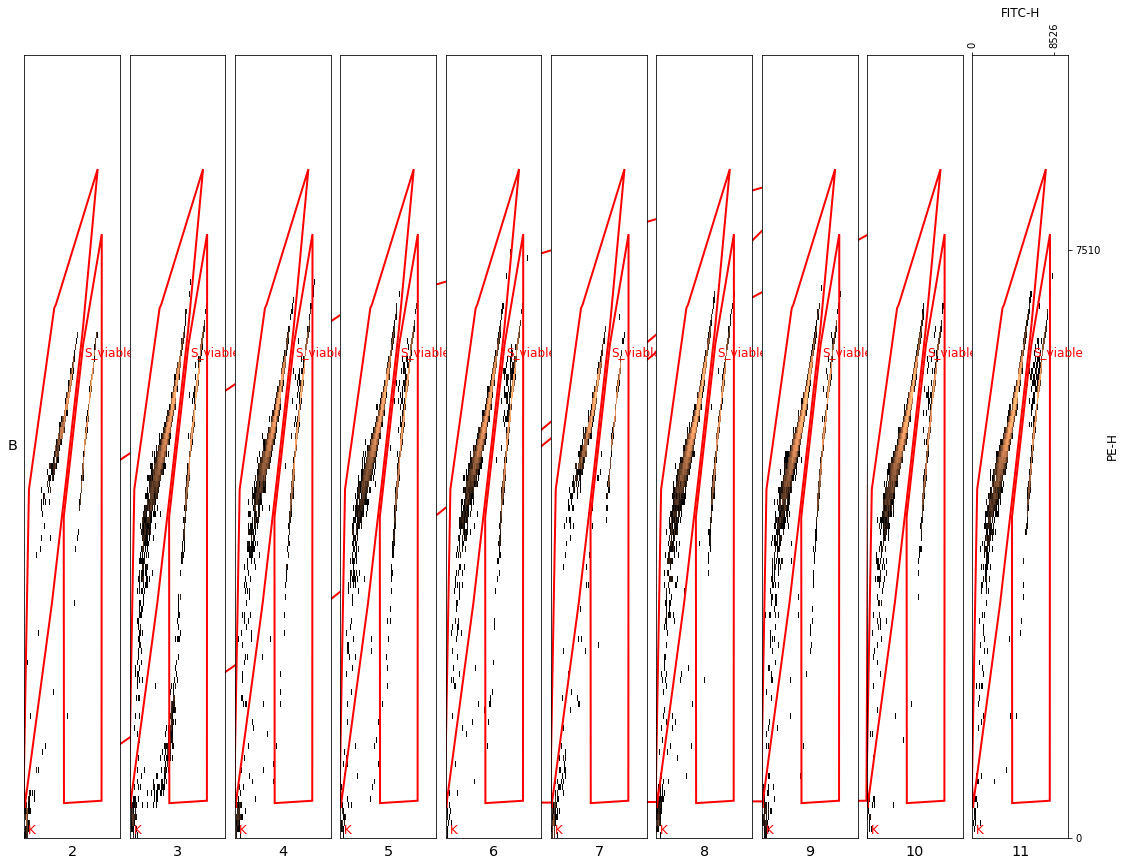

         2         3         4         5         6         7         8   \
B  0.533539  0.539259  0.512097  0.537654  0.529382  0.770823  0.781244   

         9         10        11  
B  0.765616  0.777338  0.770773  


In [27]:
#Upload cytometry data from plate
datadir = './FACS/20240828_killerstart/'

plate_0 = FCPlate.from_dir(ID='0h', path=datadir, parser='name')
plate_0 = plate_0.dropna()
plate_0 = plate_0.transform('hlog', channels=['FSC-A', 'SSC-A', 'FITC-A', 'PerCP-A', 'APC-A', 'PE-A', 'FSC-H', 'SSC-H', 'FITC-H', 'PerCP-H', 'APC-H', 'PE-H'])

fig = plt.figure(figsize=(20,15))
plate_0.plot(['FITC-H','PE-H'], bins=100, wspace=0.1, hspace=0.1);

# Loop through each subplot and add the gates
for ax in fig.get_axes():
    ax.set_xlim(0, 10000)
    ax.set_ylim(0, 10000)
    for vertices, gate in [(gateK_vertices, gateK), (gateSv_vertices, gateSv)]:
        poly = plt.Polygon(vertices, fill=None, edgecolor='r', linewidth=2)
        ax.add_patch(poly)
        ax.text(vertices[0][1], vertices[0][0], gate.name, fontsize=12, color='r')

# Show the plot
plt.show()

plate_0_cells = plate_0.gate(gateCells)
K_counts = plate_0_cells.gate(gateK).counts()
Sv_counts = plate_0_cells.gate(gateSv).counts()

fa_0 = K_counts/(K_counts+Sv_counts)

print(fa_0)

f50_1_0 = [fa_0.loc['B', 2]]
f50_10_0 = [fa_0.loc['B', 3]]
f50_20_0 = [fa_0.loc['B', 4]]
f50_50_0 = [fa_0.loc['B', 5]]
f50_100_0 = [fa_0.loc['B', 6]]

f50_0 = [fa_0.loc['B', 2],fa_0.loc['B', 3],fa_0.loc['B', 4],fa_0.loc['B', 5],fa_0.loc['B', 6]]

f75_1_0 = [fa_0.loc['B', 7]]
f75_10_0 = [fa_0.loc['B', 8]]
f75_20_0 = [fa_0.loc['B', 9]]
f75_50_0 = [fa_0.loc['B', 10]]
f75_100_0 = [fa_0.loc['B', 11]]

f75_0 = [fa_0.loc['B', 7],fa_0.loc['B', 8],fa_0.loc['B', 9],fa_0.loc['B', 10],fa_0.loc['B', 11]]

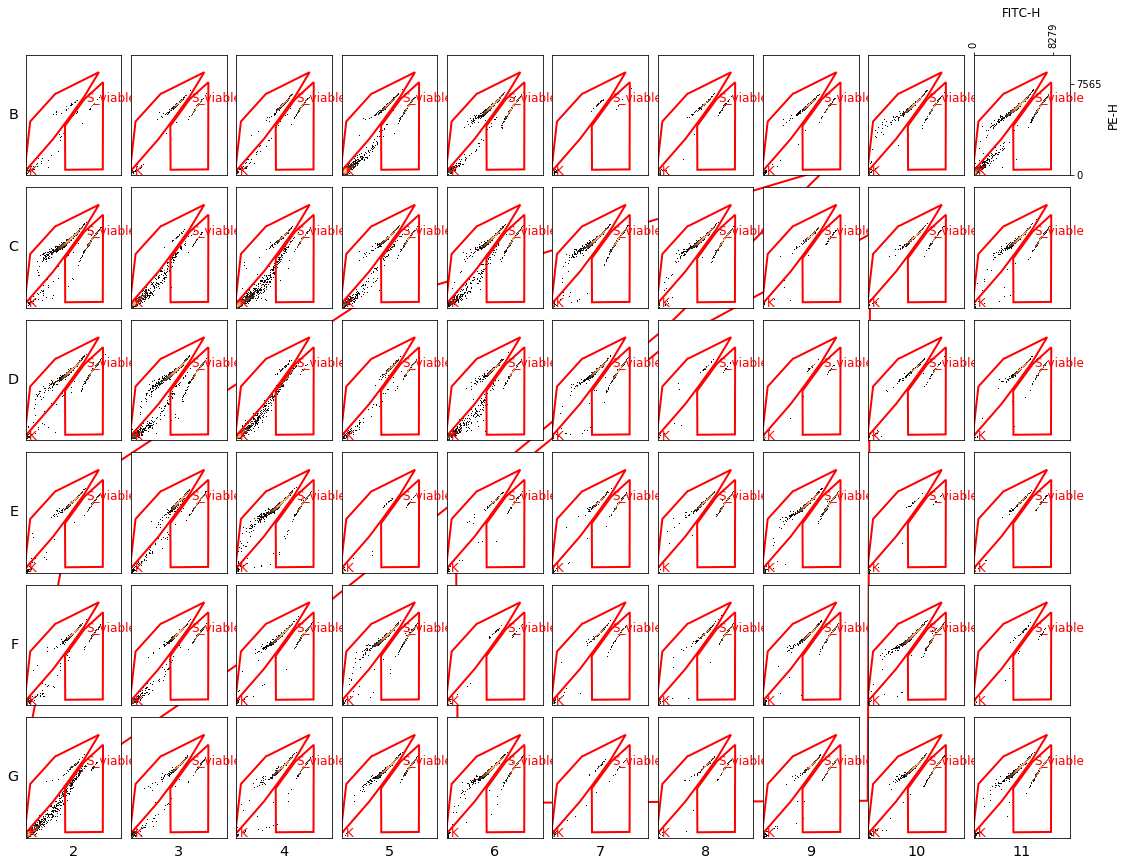

In [29]:
#Upload cytometry data from plate
datadir = './FACS/20240828_6pm/'

plate_1 = FCPlate.from_dir(ID='1', path=datadir, parser='name')
plate_1 = plate_1.dropna()
plate_1 = plate_1.transform('hlog', channels=['FSC-A', 'SSC-A', 'FITC-A', 'PerCP-A', 'APC-A', 'PE-A', 'FSC-H', 'SSC-H', 'FITC-H', 'PerCP-H', 'APC-H', 'PE-H'])

fig = plt.figure(figsize=(20,15))
plate_1.plot(['FITC-H','PE-H'], bins=100, wspace=0.1, hspace=0.1);

# Loop through each subplot and add the gates
for ax in fig.get_axes():
    ax.set_xlim(0, 10000)
    ax.set_ylim(0, 10000)
    for vertices, gate in [(gateK_vertices, gateK), (gateSv_vertices, gateSv)]:
        poly = plt.Polygon(vertices, fill=None, edgecolor='r', linewidth=2)
        ax.add_patch(poly)
        ax.text(vertices[0][1], vertices[0][0], gate.name, fontsize=12, color='r')

# Show the plot
plt.show()

plate_1_cells = plate_1.gate(gateCells)
K_counts = plate_1_cells.gate(gateK).counts()
Sv_counts = plate_1_cells.gate(gateSv).counts()

fa_1 = K_counts/(K_counts+Sv_counts)

f50_1_1 = [fa_1.loc['B', 2],fa_1.loc['C', 3],fa_1.loc['D', 4],fa_1.loc['E', 5],fa_1.loc['F', 6],fa_1.loc['G', 7]]
f50_10_1 = [fa_1.loc['B', 3],fa_1.loc['C', 4],fa_1.loc['D', 5],fa_1.loc['E', 6],fa_1.loc['F', 7],fa_1.loc['G', 8]]
f50_20_1 = [fa_1.loc['B', 4],fa_1.loc['C', 5],fa_1.loc['D', 6],fa_1.loc['E', 7],fa_1.loc['F', 8],fa_1.loc['G', 9]]
f50_50_1 = [fa_1.loc['B', 5],fa_1.loc['C', 6],fa_1.loc['D', 7],fa_1.loc['E', 8],fa_1.loc['F', 9],fa_1.loc['G', 10]]
f50_100_1 = [fa_1.loc['B', 6],fa_1.loc['C', 7],fa_1.loc['C', 8],fa_1.loc['E', 8],fa_1.loc['F', 10],fa_1.loc['G', 11]]

f75_1_1 = [fa_1.loc['B', 7],fa_1.loc['D', 8],fa_1.loc['D', 9],fa_1.loc['E', 10],fa_1.loc['F', 11],fa_1.loc['G', 2]]
f75_10_1 = [fa_1.loc['B', 8],fa_1.loc['C', 9],fa_1.loc['D', 10],fa_1.loc['E', 11],fa_1.loc['F', 2],fa_1.loc['G', 3]]
f75_20_1 = [fa_1.loc['B', 9],fa_1.loc['C', 10],fa_1.loc['D', 11],fa_1.loc['E', 2],fa_1.loc['F', 3],fa_1.loc['G', 4]]
f75_50_1 = [fa_1.loc['B', 10],fa_1.loc['C', 11],fa_1.loc['D', 2],fa_1.loc['E', 3],fa_1.loc['F', 4],fa_1.loc['G', 5]]
f75_100_1 = [fa_1.loc['B', 11],fa_1.loc['C', 2],fa_1.loc['D', 3],fa_1.loc['E', 4],fa_1.loc['F', 5],fa_1.loc['G', 6]]

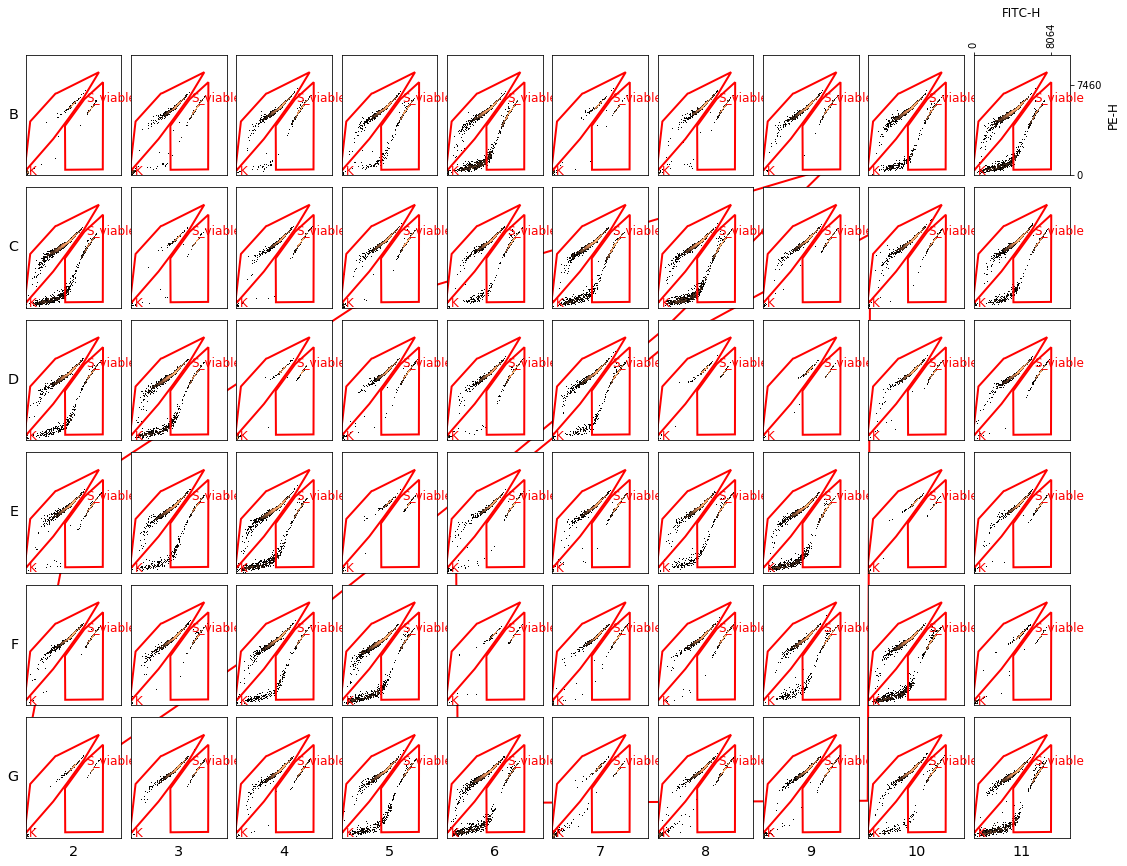

In [18]:
#Upload cytometry data from plate
datadir = './FACS/20240828_11pm/'

plate_2 = FCPlate.from_dir(ID='2', path=datadir, parser='name')
plate_2 = plate_2.dropna()
plate_2 = plate_2.transform('hlog', channels=['FSC-A', 'SSC-A', 'FITC-A', 'PerCP-A', 'APC-A', 'PE-A', 'FSC-H', 'SSC-H', 'FITC-H', 'PerCP-H', 'APC-H', 'PE-H'])

fig = plt.figure(figsize=(20,15))
plate_2.plot(['FITC-H','PE-H'], bins=100, wspace=0.1, hspace=0.1);

# # Get the current axes object
# ax = plt.gca()

# Loop through each subplot and add the gates
for ax in fig.get_axes():
    ax.set_xlim(0, 10000)
    ax.set_ylim(0, 10000)
    for vertices, gate in [(gateK_vertices, gateK), (gateSv_vertices, gateSv)]:
        poly = plt.Polygon(vertices, fill=None, edgecolor='r', linewidth=2)
        ax.add_patch(poly)
        ax.text(vertices[0][1], vertices[0][0], gate.name, fontsize=12, color='r')

# Show the plot
plt.show()

plate_2_cells = plate_2.gate(gateCells)
K_counts = plate_2_cells.gate(gateK).counts()
Sv_counts = plate_2_cells.gate(gateSv).counts()

fa_2 = K_counts/(K_counts+Sv_counts)

f50_1_2 = [fa_2.loc['B', 2],fa_2.loc['C', 3],fa_2.loc['D', 4],fa_2.loc['E', 5],fa_2.loc['F', 6],fa_2.loc['G', 7]]
f50_10_2 = [fa_2.loc['B', 3],fa_2.loc['C', 4],fa_2.loc['D', 5],fa_2.loc['E', 6],fa_2.loc['F', 7],fa_2.loc['G', 8]]
f50_20_2 = [fa_2.loc['B', 4],fa_2.loc['C', 5],fa_2.loc['D', 6],fa_2.loc['E', 7],fa_2.loc['F', 8],fa_2.loc['G', 9]]
f50_50_2 = [fa_2.loc['B', 5],fa_2.loc['C', 6],fa_2.loc['D', 7],fa_2.loc['E', 8],fa_2.loc['F', 9],fa_2.loc['G', 10]]
f50_100_2 = [fa_2.loc['B', 6],fa_2.loc['C', 7],fa_2.loc['C', 8],fa_2.loc['E', 8],fa_2.loc['F', 10],fa_2.loc['G', 11]]

f75_1_2 = [fa_2.loc['B', 7],fa_2.loc['D', 8],fa_2.loc['D', 9],fa_2.loc['E', 10],fa_2.loc['F', 11],fa_2.loc['G', 2]]
f75_10_2 = [fa_2.loc['B', 8],fa_2.loc['C', 9],fa_2.loc['D', 10],fa_2.loc['E', 11],fa_2.loc['F', 2],fa_2.loc['G', 3]]
f75_20_2 = [fa_2.loc['B', 9],fa_2.loc['C', 10],fa_2.loc['D', 11],fa_2.loc['E', 2],fa_2.loc['F', 3],fa_2.loc['G', 4]]
f75_50_2 = [fa_2.loc['B', 10],fa_2.loc['C', 11],fa_2.loc['D', 2],fa_2.loc['E', 3],fa_2.loc['F', 4],fa_2.loc['G', 5]]
f75_100_2 = [fa_2.loc['B', 11],fa_2.loc['C', 2],fa_2.loc['D', 3],fa_2.loc['E', 4],fa_2.loc['F', 5],fa_2.loc['G', 6]]

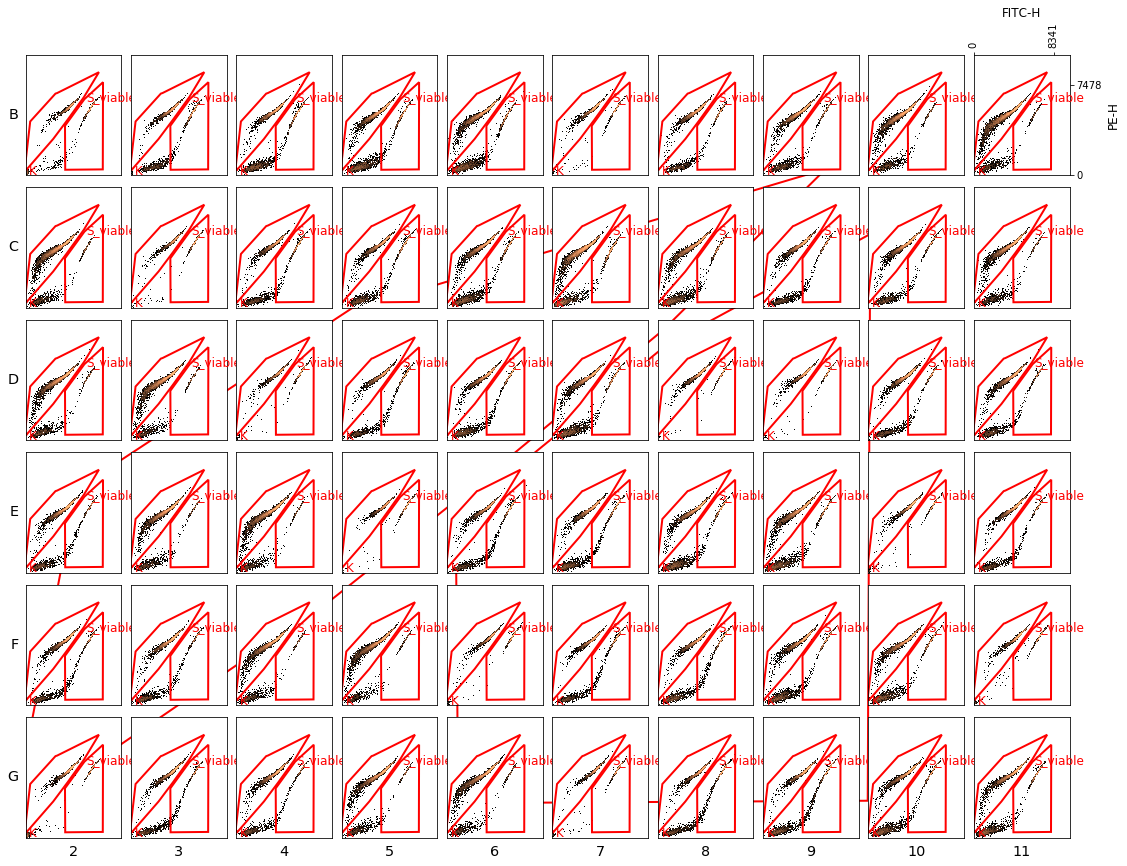

In [5]:
#Upload cytometry data from plate
datadir = './FACS/20240829_9am/'

plate_3 = FCPlate.from_dir(ID='2', path=datadir, parser='name')
plate_3 = plate_3.dropna()
plate_3 = plate_3.transform('hlog', channels=['FSC-A', 'SSC-A', 'FITC-A', 'PerCP-A', 'APC-A', 'PE-A', 'FSC-H', 'SSC-H', 'FITC-H', 'PerCP-H', 'APC-H', 'PE-H'])

fig = plt.figure(figsize=(20,15))
plate_3.plot(['FITC-H','PE-H'], bins=100, wspace=0.1, hspace=0.1);

# Loop through each subplot and add the gates
for ax in fig.get_axes():
    ax.set_xlim(0, 10000)
    ax.set_ylim(0, 10000)
    for vertices, gate in [(gateK_vertices, gateK), (gateSv_vertices, gateSv)]:
        poly = plt.Polygon(vertices, fill=None, edgecolor='r', linewidth=2)
        ax.add_patch(poly)
        ax.text(vertices[0][1], vertices[0][0], gate.name, fontsize=12, color='r')

# Show the plot
plt.show()

plate_3_cells = plate_3.gate(gateCells)
K_counts = plate_3_cells.gate(gateK).counts()
Sv_counts = plate_3_cells.gate(gateSv).counts()

fa_3 = K_counts/(K_counts+Sv_counts)

f50_1_3 = [fa_3.loc['B', 2],fa_3.loc['C', 3],fa_3.loc['D', 4],fa_3.loc['E', 5],fa_3.loc['F', 6],fa_3.loc['G', 7]]
f50_10_3 = [fa_3.loc['B', 3],fa_3.loc['C', 4],fa_3.loc['D', 5],fa_3.loc['E', 6],fa_3.loc['F', 7],fa_3.loc['G', 8]]
f50_20_3 = [fa_3.loc['B', 4],fa_3.loc['C', 5],fa_3.loc['D', 6],fa_3.loc['E', 7],fa_3.loc['F', 8],fa_3.loc['G', 9]]
f50_50_3 = [fa_3.loc['B', 5],fa_3.loc['C', 6],fa_3.loc['D', 7],fa_3.loc['E', 8],fa_3.loc['F', 9],fa_3.loc['G', 10]]
f50_100_3 = [fa_3.loc['B', 6],fa_3.loc['C', 7],fa_3.loc['C', 8],fa_3.loc['E', 8],fa_3.loc['F', 10],fa_3.loc['G', 11]]

f75_1_3 = [fa_3.loc['B', 7],fa_3.loc['D', 8],fa_3.loc['D', 9],fa_3.loc['E', 10],fa_3.loc['F', 11],fa_3.loc['G', 2]]
f75_10_3 = [fa_3.loc['B', 8],fa_3.loc['C', 9],fa_3.loc['D', 10],fa_3.loc['E', 11],fa_3.loc['F', 2],fa_3.loc['G', 3]]
f75_20_3 = [fa_3.loc['B', 9],fa_3.loc['C', 10],fa_3.loc['D', 11],fa_3.loc['E', 2],fa_3.loc['F', 3],fa_3.loc['G', 4]]
f75_50_3 = [fa_3.loc['B', 10],fa_3.loc['C', 11],fa_3.loc['D', 2],fa_3.loc['E', 3],fa_3.loc['F', 4],fa_3.loc['G', 5]]
f75_100_3 = [fa_3.loc['B', 11],fa_3.loc['C', 2],fa_3.loc['D', 3],fa_3.loc['E', 4],fa_3.loc['F', 5],fa_3.loc['G', 6]]

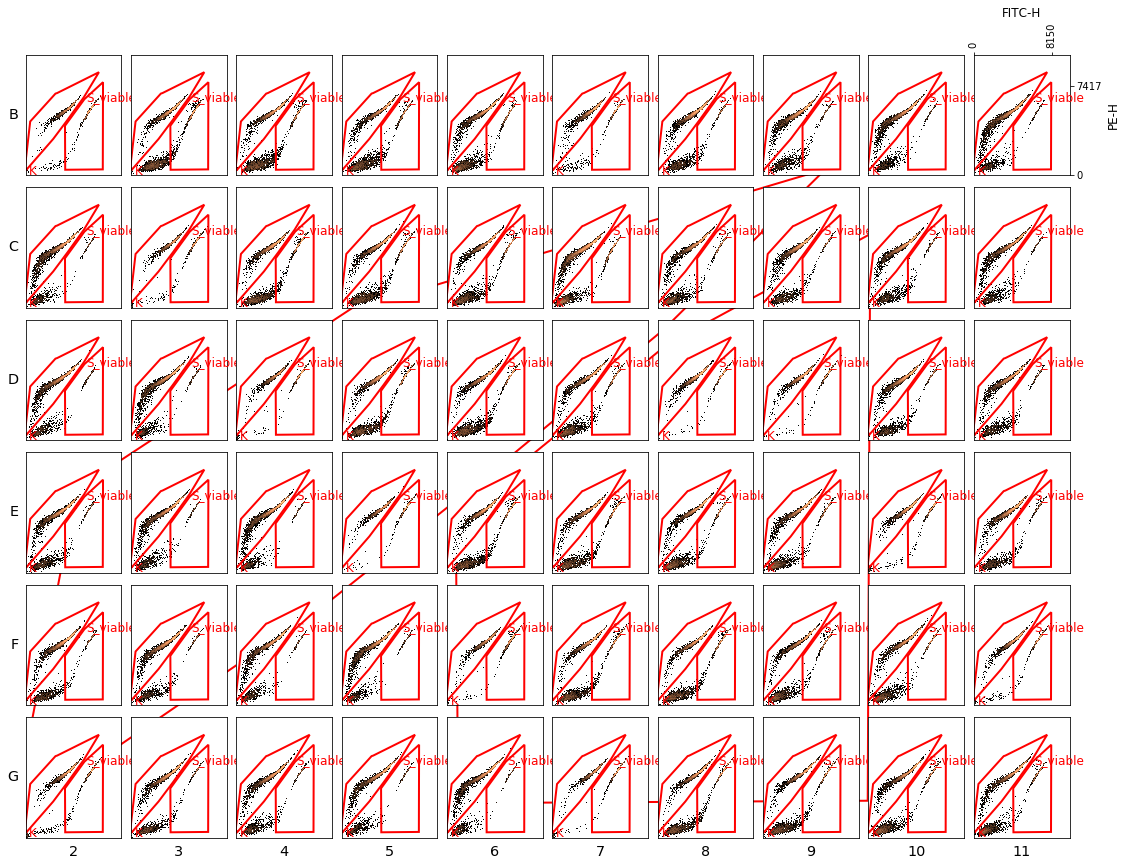

In [6]:
#Upload cytometry data from plate
datadir = './FACS/20240829_3pm/'

plate_4 = FCPlate.from_dir(ID='2', path=datadir, parser='name')
plate_4 = plate_4.dropna()
plate_4 = plate_4.transform('hlog', channels=['FSC-A', 'SSC-A', 'FITC-A', 'PerCP-A', 'APC-A', 'PE-A', 'FSC-H', 'SSC-H', 'FITC-H', 'PerCP-H', 'APC-H', 'PE-H'])

fig = plt.figure(figsize=(20,15))

plate_4.plot(['FITC-H','PE-H'], bins=100, wspace=0.1, hspace=0.1);

# Loop through each subplot and add the gates
for ax in fig.get_axes():
    ax.set_xlim(0, 10000)
    ax.set_ylim(0, 10000)
    for vertices, gate in [(gateK_vertices, gateK), (gateSv_vertices, gateSv)]:
        poly = plt.Polygon(vertices, fill=None, edgecolor='r', linewidth=2)
        ax.add_patch(poly)
        ax.text(vertices[0][1], vertices[0][0], gate.name, fontsize=12, color='r')

# Show the plot
plt.show()

plate_4_cells = plate_4.gate(gateCells)
K_counts = plate_4_cells.gate(gateK).counts()
Sv_counts = plate_4_cells.gate(gateSv).counts()

fa_4 = K_counts/(K_counts+Sv_counts)

f50_1_4 = [fa_4.loc['B', 2],fa_4.loc['C', 3],fa_4.loc['D', 4],fa_4.loc['E', 5],fa_4.loc['F', 6],fa_4.loc['G', 7]]
f50_10_4 = [fa_4.loc['B', 3],fa_4.loc['C', 4],fa_4.loc['D', 5],fa_4.loc['E', 6],fa_4.loc['F', 7],fa_4.loc['G', 8]]
f50_20_4 = [fa_4.loc['B', 4],fa_4.loc['C', 5],fa_4.loc['D', 6],fa_4.loc['E', 7],fa_4.loc['F', 8],fa_4.loc['G', 9]]
f50_50_4 = [fa_4.loc['B', 5],fa_4.loc['C', 6],fa_4.loc['D', 7],fa_4.loc['E', 8],fa_4.loc['F', 9],fa_4.loc['G', 10]]
f50_100_4 = [fa_4.loc['B', 6],fa_4.loc['C', 7],fa_4.loc['C', 8],fa_4.loc['E', 8],fa_4.loc['F', 10],fa_4.loc['G', 11]]

f75_1_4 = [fa_4.loc['B', 7],fa_4.loc['D', 8],fa_4.loc['D', 9],fa_4.loc['E', 10],fa_4.loc['F', 11],fa_4.loc['G', 2]]
f75_10_4 = [fa_4.loc['B', 8],fa_4.loc['C', 9],fa_4.loc['D', 10],fa_4.loc['E', 11],fa_4.loc['F', 2],fa_4.loc['G', 3]]
f75_20_4 = [fa_4.loc['B', 9],fa_4.loc['C', 10],fa_4.loc['D', 11],fa_4.loc['E', 2],fa_4.loc['F', 3],fa_4.loc['G', 4]]
f75_50_4 = [fa_4.loc['B', 10],fa_4.loc['C', 11],fa_4.loc['D', 2],fa_4.loc['E', 3],fa_4.loc['F', 4],fa_4.loc['G', 5]]
f75_100_4 = [fa_4.loc['B', 11],fa_4.loc['C', 2],fa_4.loc['D', 3],fa_4.loc['E', 4],fa_4.loc['F', 5],fa_4.loc['G', 6]]

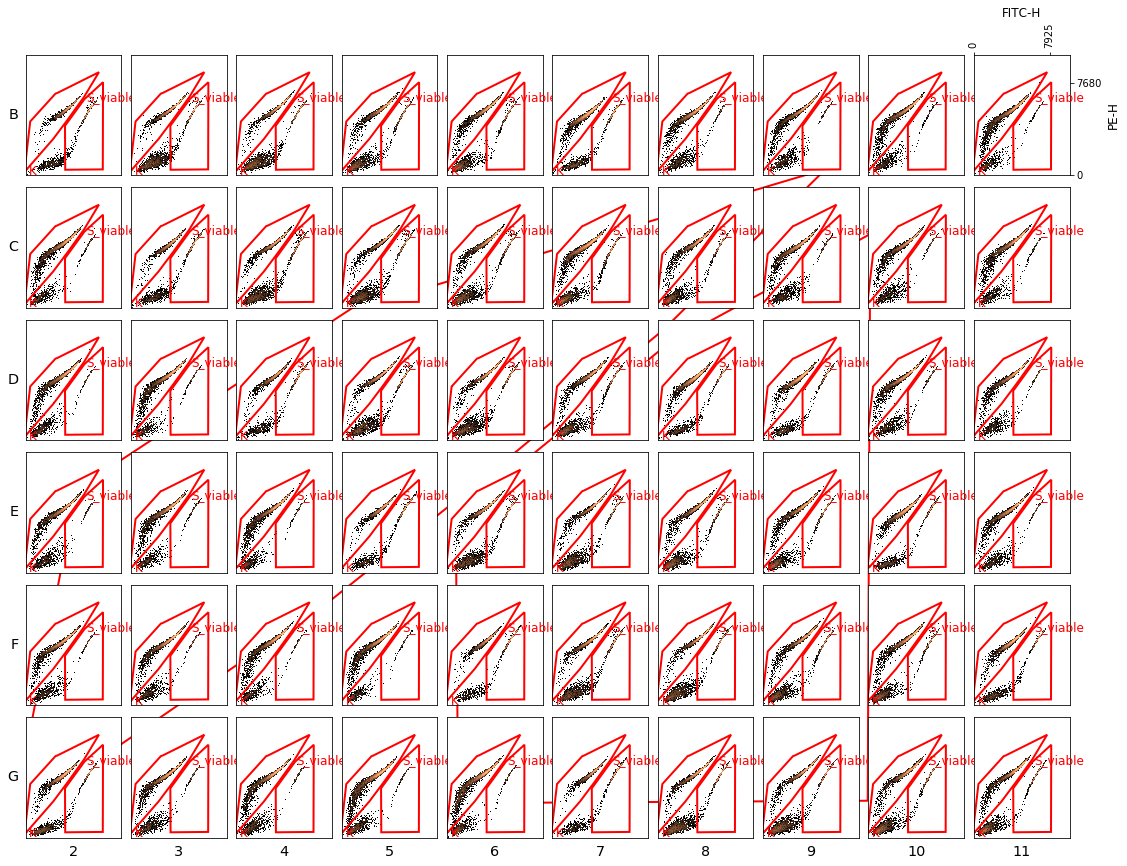

In [8]:
#Upload cytometry data from plate
datadir = './FACS/20240829_11pm/'

plate_5 = FCPlate.from_dir(ID='2', path=datadir, parser='name')
plate_5 = plate_5.dropna()
plate_5 = plate_5.transform('hlog', channels=['FSC-A', 'SSC-A', 'FITC-A', 'PerCP-A', 'APC-A', 'PE-A', 'FSC-H', 'SSC-H', 'FITC-H', 'PerCP-H', 'APC-H', 'PE-H'])

fig = plt.figure(figsize=(20,15))

plate_5.plot(['FITC-H','PE-H'], bins=100, wspace=0.1, hspace=0.1);

# Get the current axes object
ax = plt.gca()

# Loop through each subplot and add the gates
for ax in fig.get_axes():
    ax.set_xlim(0, 10000)
    ax.set_ylim(0, 10000)
    for vertices, gate in [(gateK_vertices, gateK), (gateSv_vertices, gateSv)]:
        poly = plt.Polygon(vertices, fill=None, edgecolor='r', linewidth=2)
        ax.add_patch(poly)
        ax.text(vertices[0][1], vertices[0][0], gate.name, fontsize=12, color='r')

# Show the plot
plt.show()

plate_5_cells = plate_5.gate(gateCells)
K_counts = plate_5_cells.gate(gateK).counts()
Sv_counts = plate_5_cells.gate(gateSv).counts()

fa_5 = K_counts/(K_counts+Sv_counts)

f50_1_5 = [fa_5.loc['B', 2],fa_5.loc['C', 3],fa_5.loc['D', 4],fa_5.loc['E', 5],fa_5.loc['F', 6],fa_5.loc['G', 7]]
f50_10_5 = [fa_5.loc['B', 3],fa_5.loc['C', 4],fa_5.loc['D', 5],fa_5.loc['E', 6],fa_5.loc['F', 7],fa_5.loc['G', 8]]
f50_20_5 = [fa_5.loc['B', 4],fa_5.loc['C', 5],fa_5.loc['D', 6],fa_5.loc['E', 7],fa_5.loc['F', 8],fa_5.loc['G', 9]]
f50_50_5 = [fa_5.loc['B', 5],fa_5.loc['C', 6],fa_5.loc['D', 7],fa_5.loc['E', 8],fa_5.loc['F', 9],fa_5.loc['G', 10]]
f50_100_5 = [fa_5.loc['B', 6],fa_5.loc['C', 7],fa_5.loc['C', 8],fa_5.loc['E', 8],fa_5.loc['F', 10],fa_5.loc['G', 11]]

f75_1_5 = [fa_5.loc['B', 7],fa_5.loc['D', 8],fa_5.loc['D', 9],fa_5.loc['E', 10],fa_5.loc['F', 11],fa_5.loc['G', 2]]
f75_10_5 = [fa_5.loc['B', 8],fa_5.loc['C', 9],fa_5.loc['D', 10],fa_5.loc['E', 11],fa_5.loc['F', 2],fa_5.loc['G', 3]]
f75_20_5 = [fa_5.loc['B', 9],fa_5.loc['C', 10],fa_5.loc['D', 11],fa_5.loc['E', 2],fa_5.loc['F', 3],fa_5.loc['G', 4]]
f75_50_5 = [fa_5.loc['B', 10],fa_5.loc['C', 11],fa_5.loc['D', 2],fa_5.loc['E', 3],fa_5.loc['F', 4],fa_5.loc['G', 5]]
f75_100_5 = [fa_5.loc['B', 11],fa_5.loc['C', 2],fa_5.loc['D', 3],fa_5.loc['E', 4],fa_5.loc['F', 5],fa_5.loc['G', 6]]

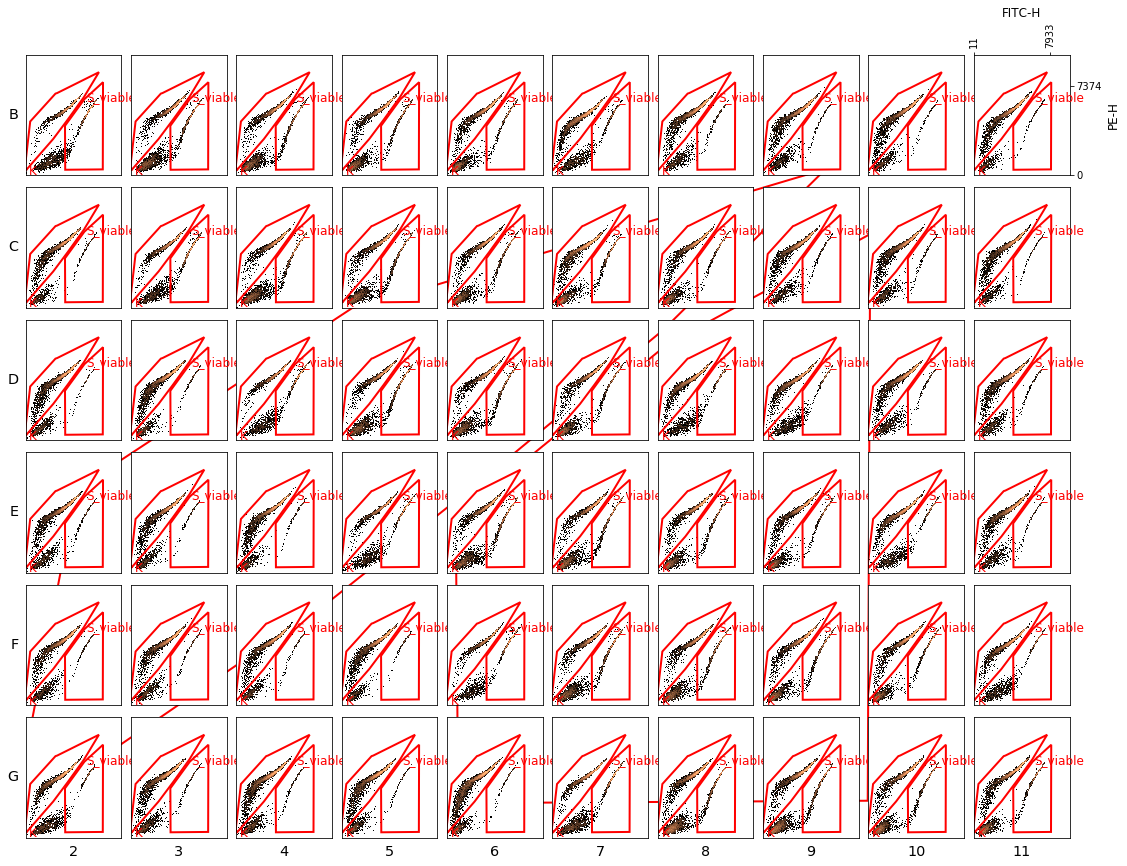

In [10]:
#Upload cytometry data from plate
datadir = './FACS/20240830_10am/'

plate_6 = FCPlate.from_dir(ID='6', path=datadir, parser='name')
plate_6 = plate_6.dropna()
plate_6 = plate_6.transform('hlog', channels=['FSC-A', 'SSC-A', 'FITC-A', 'PerCP-A', 'APC-A', 'PE-A', 'FSC-H', 'SSC-H', 'FITC-H', 'PerCP-H', 'APC-H', 'PE-H'])

fig = plt.figure(figsize=(20,15))

plate_6.plot(['FITC-H','PE-H'], bins=100, wspace=0.1, hspace=0.1);

# Get the current axes object
ax = plt.gca()

# Loop through each subplot and add the gates
for ax in fig.get_axes():
    ax.set_xlim(0, 10000)
    ax.set_ylim(0, 10000)
    for vertices, gate in [(gateK_vertices, gateK), (gateSv_vertices, gateSv)]:
        poly = plt.Polygon(vertices, fill=None, edgecolor='r', linewidth=2)
        ax.add_patch(poly)
        ax.text(vertices[0][1], vertices[0][0], gate.name, fontsize=12, color='r')

# Show the plot
plt.savefig('raster.pdf')
plt.show()

plate_6_cells = plate_6.gate(gateCells)
K_counts = plate_6_cells.gate(gateK).counts()
Sv_counts = plate_6_cells.gate(gateSv).counts()

fa_6 = K_counts/(K_counts+Sv_counts)

f50_1_6 = [fa_6.loc['B', 2],fa_6.loc['C', 3],fa_6.loc['D', 4],fa_6.loc['E', 5],fa_6.loc['F', 6],fa_6.loc['G', 7]]
f50_10_6 = [fa_6.loc['B', 3],fa_6.loc['C', 4],fa_6.loc['D', 5],fa_6.loc['E', 6],fa_6.loc['F', 7],fa_6.loc['G', 8]]
f50_20_6 = [fa_6.loc['B', 4],fa_6.loc['C', 5],fa_6.loc['D', 6],fa_6.loc['E', 7],fa_6.loc['F', 8],fa_6.loc['G', 9]]
f50_50_6 = [fa_6.loc['B', 5],fa_6.loc['C', 6],fa_6.loc['D', 7],fa_6.loc['E', 8],fa_6.loc['F', 9],fa_6.loc['G', 10]]
f50_100_6 = [fa_6.loc['B', 6],fa_6.loc['C', 7],fa_6.loc['C', 8],fa_6.loc['E', 8],fa_6.loc['F', 10],fa_6.loc['G', 11]]

f75_1_6 = [fa_6.loc['B', 7],fa_6.loc['D', 8],fa_6.loc['D', 9],fa_6.loc['E', 10],fa_6.loc['F', 11],fa_6.loc['G', 2]]
f75_10_6 = [fa_6.loc['B', 8],fa_6.loc['C', 9],fa_6.loc['D', 10],fa_6.loc['E', 11],fa_6.loc['F', 2],fa_6.loc['G', 3]]
f75_20_6 = [fa_6.loc['B', 9],fa_6.loc['C', 10],fa_6.loc['D', 11],fa_6.loc['E', 2],fa_6.loc['F', 3],fa_6.loc['G', 4]]
f75_50_6 = [fa_6.loc['B', 10],fa_6.loc['C', 11],fa_6.loc['D', 2],fa_6.loc['E', 3],fa_6.loc['F', 4],fa_6.loc['G', 5]]
f75_100_6 = [fa_6.loc['B', 11],fa_6.loc['C', 2],fa_6.loc['D', 3],fa_6.loc['E', 4],fa_6.loc['F', 5],fa_6.loc['G', 6]]

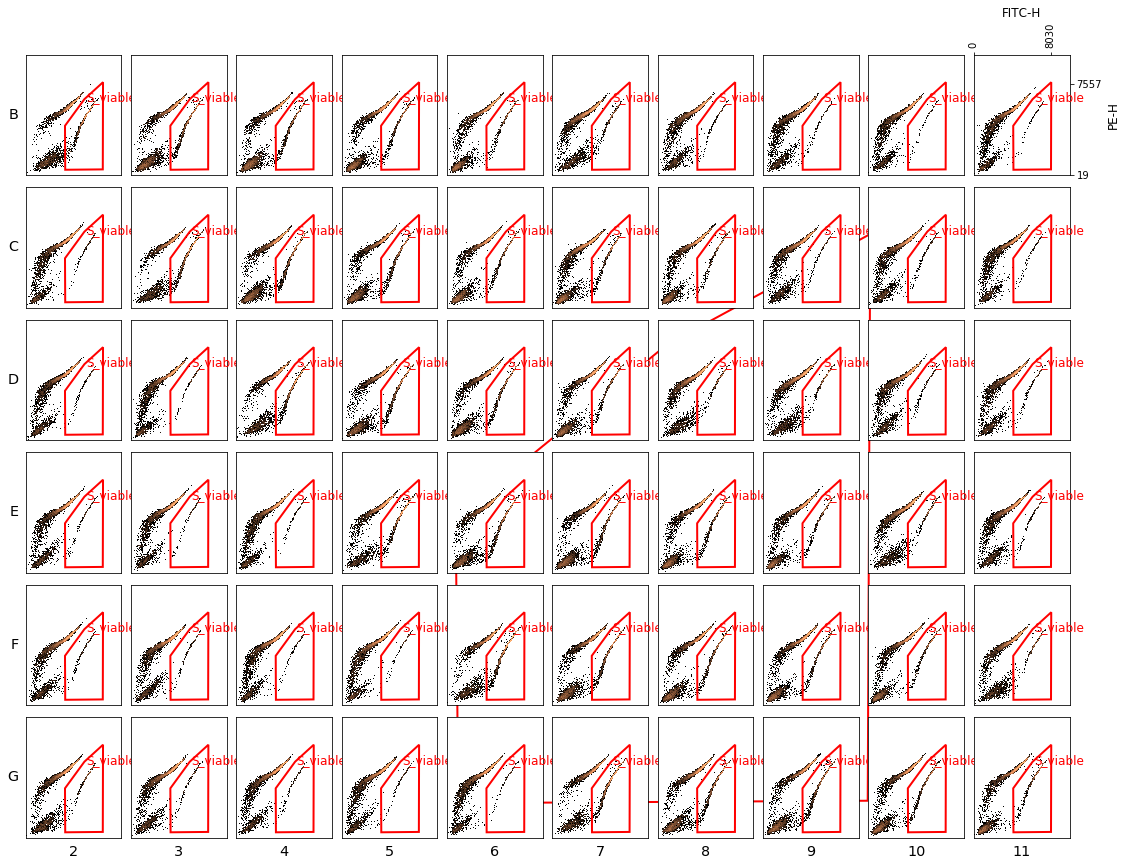

In [13]:
#Upload cytometry data from plate
datadir = './FACS/20240830_6pm/'

plate_7 = FCPlate.from_dir(ID='7', path=datadir, parser='name')
plate_7 = plate_7.dropna()
plate_7 = plate_7.transform('hlog', channels=['FSC-A', 'SSC-A', 'FITC-A', 'PerCP-A', 'APC-A', 'PE-A', 'FSC-H', 'SSC-H', 'FITC-H', 'PerCP-H', 'APC-H', 'PE-H'])

fig = plt.figure(figsize=(20,15))

plate_7.plot(['FITC-H','PE-H'], bins=100, wspace=0.1, hspace=0.1);

# Get the current axes object
ax = plt.gca()

# Loop through each subplot and add the gates
for ax in fig.get_axes():
    ax.set_xlim(0, 10000)
    ax.set_ylim(0, 10000)
    for vertices, gate in [(gateSv_vertices, gateSv)]:
        poly = plt.Polygon(vertices, fill=None, edgecolor='r', linewidth=2)
        ax.add_patch(poly)
        ax.text(vertices[0][1], vertices[0][0], gate.name, fontsize=12, color='r')

# Show the plot
plt.show()

plate_7_cells = plate_7.gate(gateCells)
K_counts = plate_7_cells.gate(gateK).counts()
Sv_counts = plate_7_cells.gate(gateSv).counts()

fa_7 = K_counts/(K_counts+Sv_counts)

f50_1_7 = [fa_7.loc['B', 2],fa_7.loc['C', 3],fa_7.loc['D', 4],fa_7.loc['E', 5],fa_7.loc['F', 6],fa_7.loc['G', 7]]
f50_10_7 = [fa_7.loc['B', 3],fa_7.loc['C', 4],fa_7.loc['D', 5],fa_7.loc['E', 6],fa_7.loc['F', 7],fa_7.loc['G', 8]]
f50_20_7 = [fa_7.loc['B', 4],fa_7.loc['C', 5],fa_7.loc['D', 6],fa_7.loc['E', 7],fa_7.loc['F', 8],fa_7.loc['G', 9]]
f50_50_7 = [fa_7.loc['B', 5],fa_7.loc['C', 6],fa_7.loc['D', 7],fa_7.loc['E', 8],fa_7.loc['F', 9],fa_7.loc['G', 10]]
f50_100_7 = [fa_7.loc['B', 6],fa_7.loc['C', 7],fa_7.loc['C', 8],fa_7.loc['E', 8],fa_7.loc['F', 10],fa_7.loc['G', 11]]

f75_1_7 = [fa_7.loc['B', 7],fa_7.loc['D', 8],fa_7.loc['D', 9],fa_7.loc['E', 10],fa_7.loc['F', 11],fa_7.loc['G', 2]]
f75_10_7 = [fa_7.loc['B', 8],fa_7.loc['C', 9],fa_7.loc['D', 10],fa_7.loc['E', 11],fa_7.loc['F', 2],fa_7.loc['G', 3]]
f75_20_7 = [fa_7.loc['B', 9],fa_7.loc['C', 10],fa_7.loc['D', 11],fa_7.loc['E', 2],fa_7.loc['F', 3],fa_7.loc['G', 4]]
f75_50_7 = [fa_7.loc['B', 10],fa_7.loc['C', 11],fa_7.loc['D', 2],fa_7.loc['E', 3],fa_7.loc['F', 4],fa_7.loc['G', 5]]
f75_100_7 = [fa_7.loc['B', 11],fa_7.loc['C', 2],fa_7.loc['D', 3],fa_7.loc['E', 4],fa_7.loc['F', 5],fa_7.loc['G', 6]]

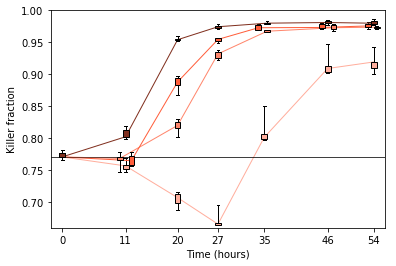

In [21]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors

def lighten_color(color, amount=0.5):
    """Lighten the given color by the amount."""
    c = mcolors.to_rgb(color)
    return mcolors.to_hex([1 - (1 - x) * (1 - amount) for x in c])

def darken_color(color, amount=0.5):
    """Darken the given color by the amount."""
    c = mcolors.to_rgb(color)
    return mcolors.to_hex([x * (1 - amount) for x in c])

# Original color
orange_color = '#FF5E3B'

# Generate shades
lighter_shade_1 = lighten_color(orange_color, 0.5)
lighter_shade_2 = lighten_color(orange_color, 0.25)
darker_shade_1 = darken_color(orange_color, 0.5)

# Create the main plot
fig, ax = plt.subplots(figsize=(6,4))  # Change the size as needed

times = np.array([0, 11, 20, 27, 35, 46, 54])

# Compute the medians for f75 and f75 at each time point
medians_f75 = [np.median(data) for data in [f75_0, f75_1_2, f75_1_3, f75_1_4, f75_1_5, f75_1_6, f75_1_7]]

# Plot the lines connecting the medians
plt.plot(times, medians_f75, color=lighter_shade_1, marker='None', linestyle='-', linewidth=1, label='50% initial fraction')

# Create the first boxplot
boxplot1 = plt.boxplot([f75_0, f75_1_2, f75_1_3, f75_1_4, f75_1_5, f75_1_6, f75_1_7], positions=times, widths=1, showfliers=False, patch_artist=True, whis=[0, 100], medianprops=dict(color='None'))

# Set colors for the first boxplot
colors1 = [lighter_shade_1] * len(times)
for patch, color in zip(boxplot1['boxes'], colors1):
    patch.set_facecolor(color)

# Add horizontal line: median initial fraction of killer cells
plt.axhline(y=np.median(f75_0), color='black', linestyle='-', linewidth=0.5)

plt.xlabel('Time (hours)')
plt.ylabel('Killer fraction')

times = np.array([0, 10, 20, 27, 35.5, 47, 54.5])

# Compute the medians for f75 and f75 at each time point
medians_f75 = [np.median(data) for data in [f75_0, f75_10_2, f75_10_3, f75_10_4, f75_10_5, f75_10_6, f75_10_7]]

# Plot the lines connecting the medians
plt.plot(times, medians_f75, color=lighter_shade_2, marker='None', linestyle='-', linewidth=1, label='50% initial fraction')

# Create the boxplot
boxplot1 = plt.boxplot([f75_0,f75_10_2,f75_10_3,f75_10_4,f75_10_5,f75_10_6,f75_10_7], positions=times, widths=1, showfliers=False, patch_artist=True, whis=[0, 100], medianprops=dict(color='None'));

# Set colors for the first boxplot
colors1 = [lighter_shade_2] * len(times)
for patch, color in zip(boxplot1['boxes'], colors1):
    patch.set_facecolor(color)

times = np.array([0, 12, 20, 27, 34, 45, 53])

# Compute the medians for f75 and f75 at each time point
medians_f75 = [np.median(data) for data in [f75_0, f75_20_2, f75_20_3, f75_20_4, f75_20_5, f75_20_6, f75_20_7]]

# Plot the lines connecting the medians
plt.plot(times, medians_f75, color=orange_color, marker='None', linestyle='-', linewidth=1, label='50% initial fraction')

# Create the boxplot
boxplot1 = plt.boxplot([f75_0,f75_20_2,f75_20_3,f75_20_4,f75_20_5,f75_20_6,f75_20_7], positions=times, widths=1, showfliers=False, patch_artist=True, whis=[0, 100], medianprops=dict(color='None'));

# Set colors for the first boxplot
colors1 = [orange_color] * len(times)
for patch, color in zip(boxplot1['boxes'], colors1):
    patch.set_facecolor(color)

times = np.array([0, 11, 20, 27, 35.5, 46, 54])

# Compute the medians for f75 and f75 at each time point
medians_f75 = [np.median(data) for data in [f75_0, f75_50_2, f75_50_3, f75_50_4, f75_50_5, f75_50_6, f75_50_7]]

# Plot the lines connecting the medians
plt.plot(times, medians_f75, color=darker_shade_1, marker='None', linestyle='-', linewidth=1, label='50% initial fraction')

# Create the boxplot
boxplot1 = plt.boxplot([f75_0,f75_50_2,f75_50_3,f75_50_4,f75_50_5,f75_50_6,f75_50_7], positions=times, widths=1, showfliers=False, patch_artist=True, whis=[0, 100], medianprops=dict(color='None'));

# Set colors for the first boxplot
colors1 = [darker_shade_1] * len(times)
for patch, color in zip(boxplot1['boxes'], colors1):
    patch.set_facecolor(color)

# Add horizontal line: median initial fraction of killer cells
plt.axhline(y=np.median(f75_0), color='black', linestyle='-', linewidth=0.5)

# Adjust x-axis limits to match the data range plus some padding
plt.xlim(min(times) - 2, max(times) + 2)
ax.set_ylim(0.66, 1.0)

times = np.array([0, 11, 20, 27, 35, 46, 54])
# Customize x-axis
plt.xticks(times, times)

# Show the plot (optional)
plt.savefig('f75_all_54.pdf')
plt.show()

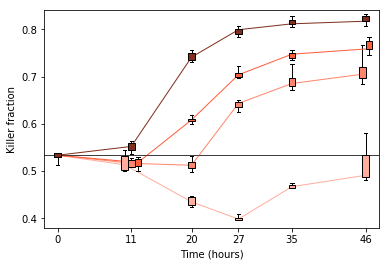

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
import matplotlib.colors as mcolors

def lighten_color(color, amount=0.5):
    """Lighten the given color by the amount."""
    c = mcolors.to_rgb(color)
    return mcolors.to_hex([1 - (1 - x) * (1 - amount) for x in c])

def darken_color(color, amount=0.5):
    """Darken the given color by the amount."""
    c = mcolors.to_rgb(color)
    return mcolors.to_hex([x * (1 - amount) for x in c])

# Original color
orange_color = '#FF5E3B'

# Generate shades
lighter_shade_1 = lighten_color(orange_color, 0.5)
lighter_shade_2 = lighten_color(orange_color, 0.25)
darker_shade_1 = darken_color(orange_color, 0.5)

dt1=0.8

# Create the main plot
fig, ax = plt.subplots(figsize=(6,4))  # Change the size as needed

times = np.array([0, 10, 20, 27, 35, 46])

# Compute the medians for f50 and f50 at each time point
medians_f50 = [np.median(data) for data in [f50_0, f50_1_2, f50_1_3, f50_1_4, f50_1_5, f50_1_6]]

# Plot the lines connecting the medians
plt.plot(times, medians_f50, color=lighter_shade_1, marker='None', linestyle='-', linewidth=1, label='50% initial fraction')

# Create the first boxplot
boxplot1 = plt.boxplot([f50_0, f50_1_2, f50_1_3, f50_1_4, f50_1_5, f50_1_6], positions=times, widths=1, showfliers=False, patch_artist=True, whis=[0, 100], medianprops=dict(color='None'))

# Set colors for the first boxplot
colors1 = [lighter_shade_1] * len(times_75_bplot)
for patch, color in zip(boxplot1['boxes'], colors1):
    patch.set_facecolor(color)

# Customize x-axis
plt.xticks(times, times)

# Add horizontal line: median initial fraction of killer cells
plt.axhline(y=np.median(f50_0), color='black', linestyle='-', linewidth=0.5)

plt.xlabel('Time (hours)')
plt.ylabel('Killer fraction')

times = np.array([0, 11, 20, 27, 35, 45.5])

# Compute the medians for f50 and f50 at each time point
medians_f50 = [np.median(data) for data in [f50_0, f50_10_2, f50_10_3, f50_10_4, f50_10_5, f50_10_6]]

# Plot the lines connecting the medians
plt.plot(times, medians_f50, color=lighter_shade_2, marker='None', linestyle='-', linewidth=1, label='50% initial fraction')

# Create the boxplot
boxplot1 = plt.boxplot([f50_0,f50_10_2,f50_10_3,f50_10_4,f50_10_5,f50_10_6], positions=times, widths=1, showfliers=False, patch_artist=True, whis=[0, 100], medianprops=dict(color='None'));

# Set colors for the first boxplot
colors1 = [lighter_shade_2] * len(times_75_bplot)
for patch, color in zip(boxplot1['boxes'], colors1):
    patch.set_facecolor(color)

times = np.array([0, 12, 20, 27, 35, 46.5])

# Compute the medians for f50 and f50 at each time point
medians_f50 = [np.median(data) for data in [f50_0, f50_20_2, f50_20_3, f50_20_4, f50_20_5, f50_20_6]]

# Plot the lines connecting the medians
plt.plot(times, medians_f50, color=orange_color, marker='None', linestyle='-', linewidth=1, label='50% initial fraction')

# Create the boxplot
boxplot1 = plt.boxplot([f50_0,f50_20_2,f50_20_3,f50_20_4,f50_20_5,f50_20_6], positions=times, widths=1, showfliers=False, patch_artist=True, whis=[0, 100], medianprops=dict(color='None'));

# Set colors for the first boxplot
colors1 = [orange_color] * len(times_75_bplot)
for patch, color in zip(boxplot1['boxes'], colors1):
    patch.set_facecolor(color)

times = np.array([0, 11, 20, 27, 35, 46])

# Compute the medians for f50 and f50 at each time point
medians_f50 = [np.median(data) for data in [f50_0, f50_50_2, f50_50_3, f50_50_4, f50_50_5, f50_50_6]]

# Plot the lines connecting the medians
plt.plot(times, medians_f50, color=darker_shade_1, marker='None', linestyle='-', linewidth=1, label='50% initial fraction')

# Create the boxplot
boxplot1 = plt.boxplot([f50_0,f50_50_2,f50_50_3,f50_50_4,f50_50_5,f50_50_6], positions=times, widths=1, showfliers=False, patch_artist=True, whis=[0, 100], medianprops=dict(color='None'));

# Set colors for the first boxplot
colors1 = [darker_shade_1] * len(times_75_bplot)
for patch, color in zip(boxplot1['boxes'], colors1):
    patch.set_facecolor(color)

# Add horizontal line: median initial fraction of killer cells
plt.axhline(y=np.median(f50_0), color='black', linestyle='-', linewidth=0.5)

# Adjust x-axis limits to match the data range plus some padding
plt.xlim(min(times) - 2, max(times) + 2)
ax.set_ylim(0.38, 0.84)

# Show the plot (optional)
plt.savefig('f50_all.pdf')
plt.show()